<a href="https://colab.research.google.com/github/danieltumanggor/UTS-Pengolahan-Citra-Daniel-Tumanggor/blob/main/PengolahanCitra/UTS_DT_PC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('image DT.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape



In [ ]:
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

In [ ]:
def ideal_lpf(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows//2, cols//2

    H = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if d <= cutoff:
                H[i, j] = 1
    return H


In [ ]:
def gaussian_lpf(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows//2, cols//2

    x = np.linspace(0, rows-1, rows)
    y = np.linspace(0, cols-1, cols)
    X, Y = np.meshgrid(y, x)
    D = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    H = np.exp(-(D**2) / (2*(cutoff**2)))
    return H

cutoffs = [10, 30, 60]

ideal_results = []
gauss_results = []



In [ ]:
for c in cutoffs:
    H_ideal = ideal_lpf(img.shape, c)
    H_gauss = gaussian_lpf(img.shape, c)

    # Ideal LPF result
    F_i = F_shift * H_ideal
    img_i = np.abs(np.fft.ifft2(np.fft.ifftshift(F_i)))
    ideal_results.append(img_i)

    # Gaussian LPF result
    F_g = F_shift * H_gauss
    img_g = np.abs(np.fft.ifft2(np.fft.ifftshift(F_g)))
    gauss_results.append(img_g)

In [ ]:
x1, y1 = 100, 100
x2, y2 = 200, 200

roi_original = img[x1:x2, y1:y2]

roi_ideal = [r[x1:x2, y1:y2] for r in ideal_results]
roi_gauss = [r[x1:x2, y1:y2] for r in gauss_results]

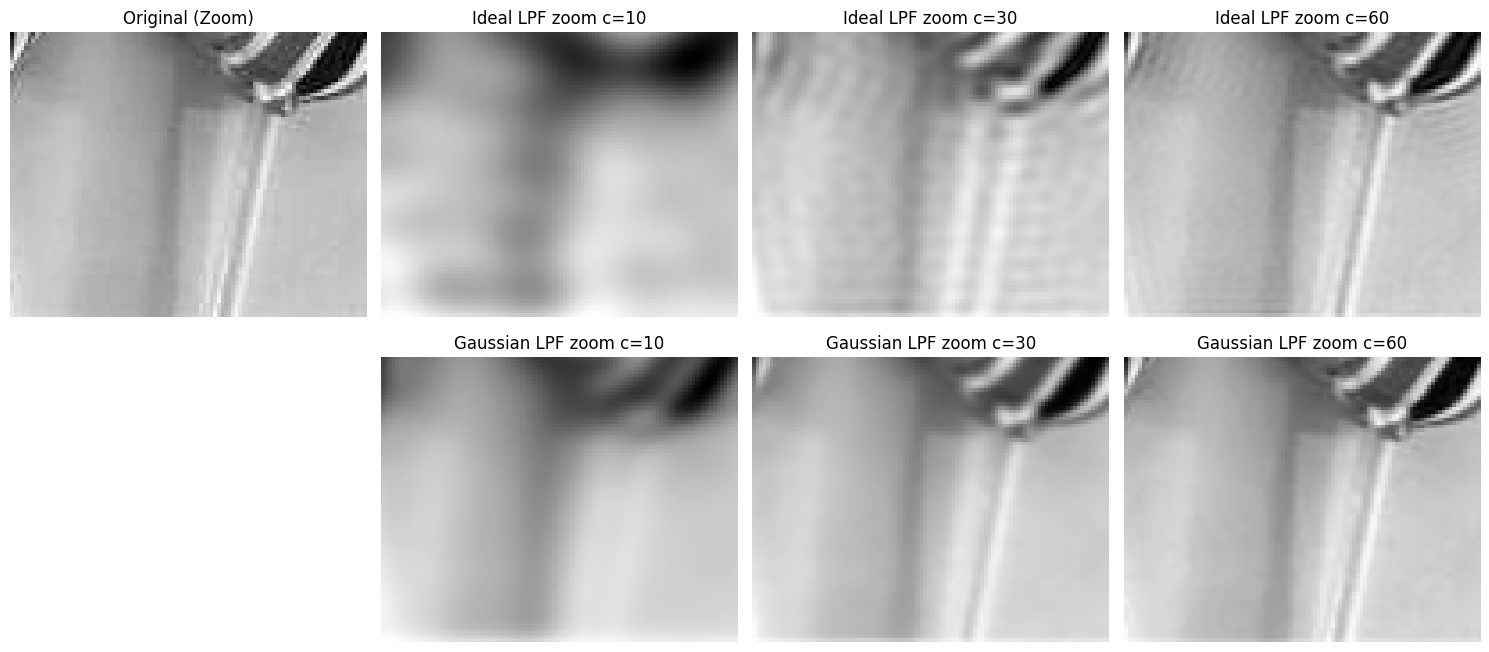

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.imshow(roi_original, cmap='gray')
plt.title("Original (Zoom)")
plt.axis('off')

for i, c in enumerate(cutoffs):
    plt.subplot(3,4,2 + i)
    plt.imshow(roi_ideal[i], cmap='gray')
    plt.title(f"Ideal LPF zoom c={c}")
    plt.axis('off')

for i, c in enumerate(cutoffs):
    plt.subplot(3,4,6 + i)
    plt.imshow(roi_gauss[i], cmap='gray')
    plt.title(f"Gaussian LPF zoom c={c}")
    plt.axis('off')

plt.tight_layout()
plt.show()